# Regresión SVR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

In [2]:
dataset = pd.read_csv('../data/salaries_position.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

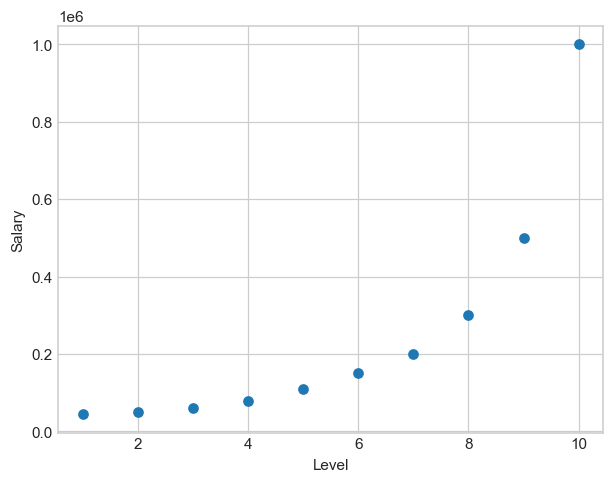

In [3]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [5]:
print(X.ndim)
print(y.ndim)

2
2


In [6]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian.
# SVR. We have a non-linear condition so we can select polynomial or gaussian but here
# we select RBF(a gaussian type) kernel.
model = SVR()
model.fit(X, y.ravel())

SVR()

In [8]:
input = np.array([[6.5]])
input_scaled = sc_X.transform(input)
prediction = model.predict(input_scaled)
print(prediction)

[-0.27861589]


In [9]:
prediction_2d = prediction.reshape(-1, 1)
print(prediction_2d)

[[-0.27861589]]


In [10]:
y_pred = sc_y.inverse_transform(prediction_2d)
print(y_pred)

[[170370.0204065]]


In [11]:
# y_pred = sc_y.inverse_transform((model.predict(sc_X.transform(np.array([[6.5]])))))
# y_pred

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = round(model.score(X, y),2)
mae = mean_absolute_error([[180000]], y_pred)
print(r2)
print(mae)

0.75
9629.979593497643


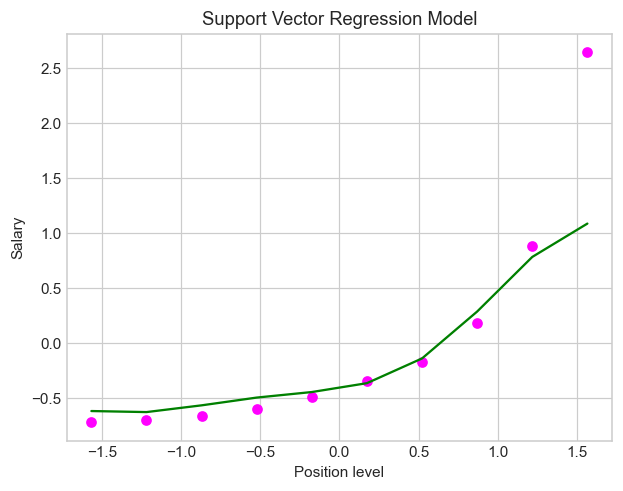

In [13]:
#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, model.predict(X), color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
#6 Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid

array([[-1.5666989],
       [-1.4666989],
       [-1.3666989],
       [-1.2666989],
       [-1.1666989],
       [-1.0666989],
       [-0.9666989],
       [-0.8666989],
       [-0.7666989],
       [-0.6666989],
       [-0.5666989],
       [-0.4666989],
       [-0.3666989],
       [-0.2666989],
       [-0.1666989],
       [-0.0666989],
       [ 0.0333011],
       [ 0.1333011],
       [ 0.2333011],
       [ 0.3333011],
       [ 0.4333011],
       [ 0.5333011],
       [ 0.6333011],
       [ 0.7333011],
       [ 0.8333011],
       [ 0.9333011],
       [ 1.0333011],
       [ 1.1333011],
       [ 1.2333011],
       [ 1.3333011],
       [ 1.4333011],
       [ 1.5333011]])

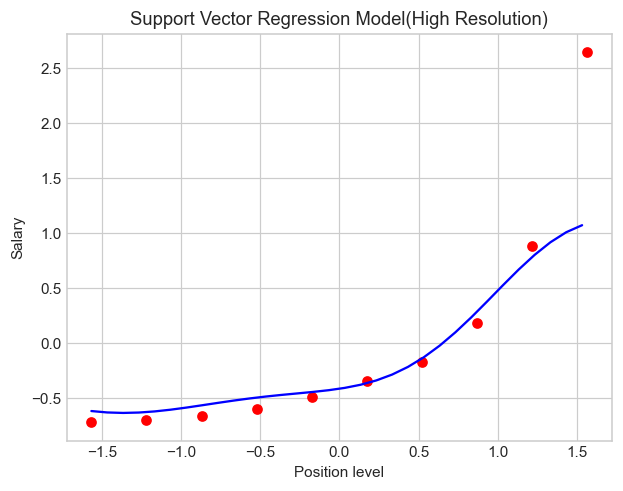

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Support Vector Regression Model(High Resolution)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Ajuste transform

In [16]:
dataset = pd.read_csv('../data/salaries_position.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
print(X[:10])

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [17]:
print(y[:10])

[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [18]:
model = SVR(kernel='linear')
model.fit(X,y.ravel())

SVR(kernel='linear')

In [19]:
r2 = round(model.score(X, y), 2)
print(r2)

-0.18


In [20]:
input = np.array([[6.5]])
prediction = model.predict(input)
print(prediction)

[130025.]
